# Using Convolutional Neural Networks

In [1]:
%matplotlib inline

In [7]:
from __future__ import division,print_function

import os, json
from glob import glob
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt

In [9]:
import utils; reload(utils)
from utils import plots

## Use VGG16

In [10]:
# Import our class, and instantiate
import vgg16; reload(vgg16)
from vgg16 import Vgg16

In [11]:
vgg = Vgg16()

vgg16.py:100: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  model.add(Convolution2D(filters, 3, 3, activation='relu'))
vgg16.py:100: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  model.add(Convolution2D(filters, 3, 3, activation='relu'))
vgg16.py:100: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  model.add(Convolution2D(filters, 3, 3, activation='relu'))
vgg16.py:100: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
  model.add(Convolution2D(filters, 3, 3, activation='relu'))


16384/35363 [============>.................] - ETA: 0s

In [12]:
path = "data/dogscats/sample/"

In [13]:
batches = vgg.get_batches(path+'train', batch_size=4)

Found 16 images belonging to 2 classes.


In [14]:
imgs,labels = next(batches)

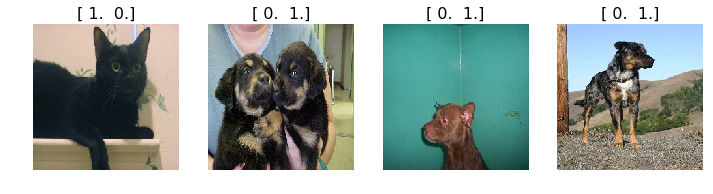

In [15]:
plots(imgs, titles=labels)

In [16]:
??vgg.predict

In [17]:
vgg.predict(imgs, details=True)

(array([ 0.3379,  0.8657,  0.4229,  0.1735], dtype=float32),
 array([285, 244, 151, 227]),
 [u'Egyptian_cat', u'Tibetan_mastiff', u'Chihuahua', u'kelpie'])

In [18]:
vgg.classes[:4]

[u'tench', u'goldfish', u'great_white_shark', u'tiger_shark']

## Fine Tune for dogs and cats

In [19]:
batch_size=64

In [ ]:
path = "data/dogscats/"

In [25]:
batches = vgg.get_batches(path+'train', batch_size=batch_size)
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size)

Found 16 images belonging to 2 classes.
Found 8 images belonging to 2 classes.


nb_class seems to have been renamed to num_class and nb_sample to samples, so when runningVgg16.fit, they need to aliased (or probably better to just modify vg16.py directly):

In [26]:
batches.nb_class = batches.num_class
batches.nb_sample = batches.samples
val_batches.nb_class = batches.num_class
val_batches.nb_sample = val_batches.samples

In [27]:
vgg.finetune(batches)

In [28]:
vgg.fit(batches, val_batches, nb_epoch=1)

Epoch 1/1


UnboundLocalError: local variable 'epoch_logs' referenced before assignment